PROBLEM STATEMENT

The sinking of the Titanic on April 15th, 1912 is one of the most tragic tragedies in history. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to the lack of lifeboats for all passengers and crew. Some passengers were more likely to survive than others, such as women, children, and upper-class. This case study analyzes what sorts of people were likely to survive this tragedy. The dataset includes the following:

Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Sex: Sex
Age: Age in years
Sibsp: # of siblings / spouses aboard the Titanic
Parch: # of parents / children aboard the Titanic
Ticket: Ticket number
Fare: Passenger fare
Cabin: Cabin number
Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
Target class: Survived: Survival (0 = No, 1 = Yes)


DATA SOURCE: https://www.kaggle.com/c/titanic

STEP #1: IMPORT DATASET

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
training_set = pd.read_csv('Train_Titanic.csv')

In [34]:
training_set.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

STEP #2: EXPLORE/VISUALIZE DATASET

In [35]:
# separate surviving and deceased people
survived = training_set[ training_set['Survived'] == 1]
not_survived = training_set[ training_set['Survived'] == 0]

In [36]:
# print number of people who survived and did not survive
print("Number of people who survived = ", len(survived))
print("Number of people who did no survive = ", len(not_survived))

Number of people who survived =  342
Number of people who did no survive =  549


In [37]:
# print percentage of survived and deceased
print("% Survived = ", 1.*len(survived)/len(training_set) * 100)
print("% Did not survive = ", 1.*len(not_survived)/len(training_set) * 100)

% Survived =  38.38383838383838
% Did not survive =  61.61616161616161


<AxesSubplot:xlabel='Pclass', ylabel='count'>

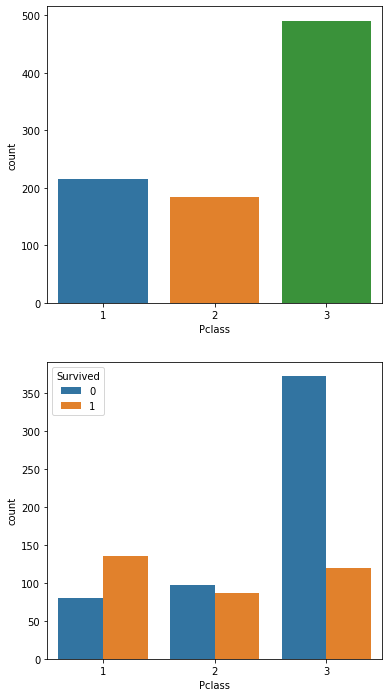

In [38]:
# plotting the survival figures wrt to class
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data = training_set)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

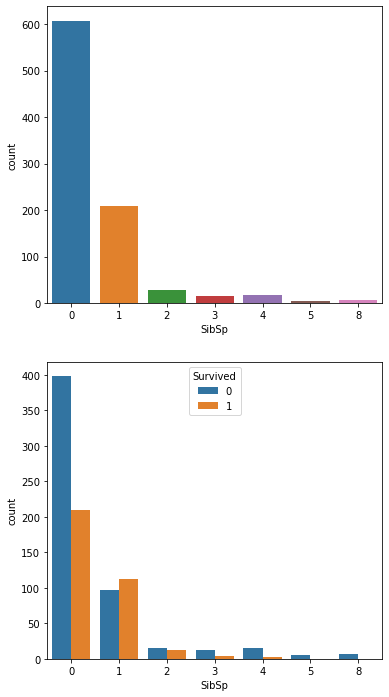

In [39]:
# plotting the survival figures wrt to number of siblings onboard
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot(x = 'SibSp', data = training_set)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data = training_set)

<AxesSubplot:xlabel='Parch', ylabel='count'>

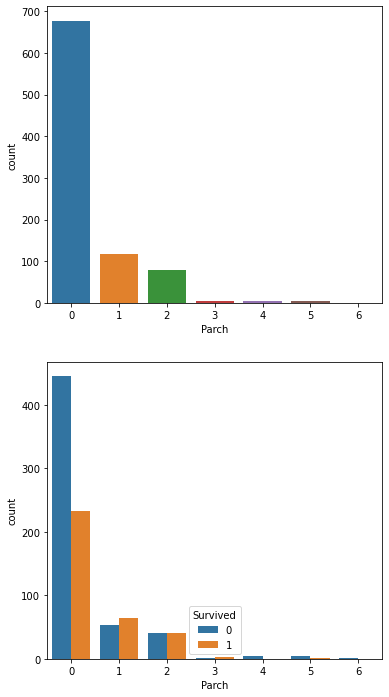

In [40]:
# plotting the survival figures wrt parents onboard
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot(x = 'Parch', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data = training_set)


<AxesSubplot:xlabel='Embarked', ylabel='count'>

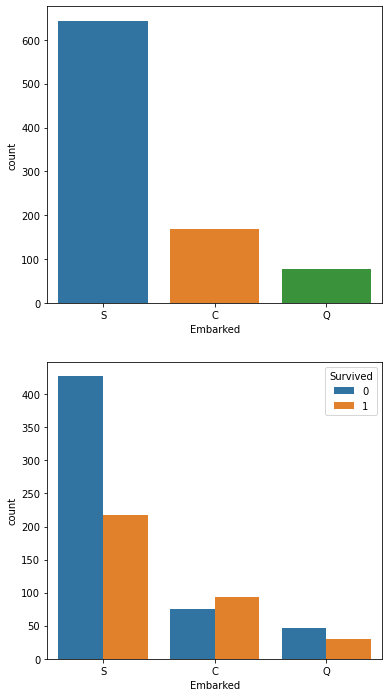

In [41]:
# plotting the survival figures relative to location the passangers boarded the ship
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot(x = 'Embarked', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Embarked', hue = 'Survived', data = training_set)


<AxesSubplot:xlabel='Sex', ylabel='count'>

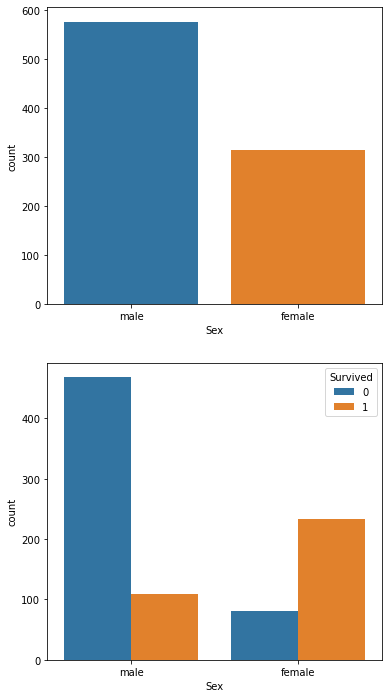

In [42]:
# plotting the survival figures wrt to sex of passangers
plt.figure(figsize = [6, 12])
plt.subplot(211)
sns.countplot(x = 'Sex', data = training_set)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data = training_set)


<AxesSubplot:xlabel='Age', ylabel='count'>

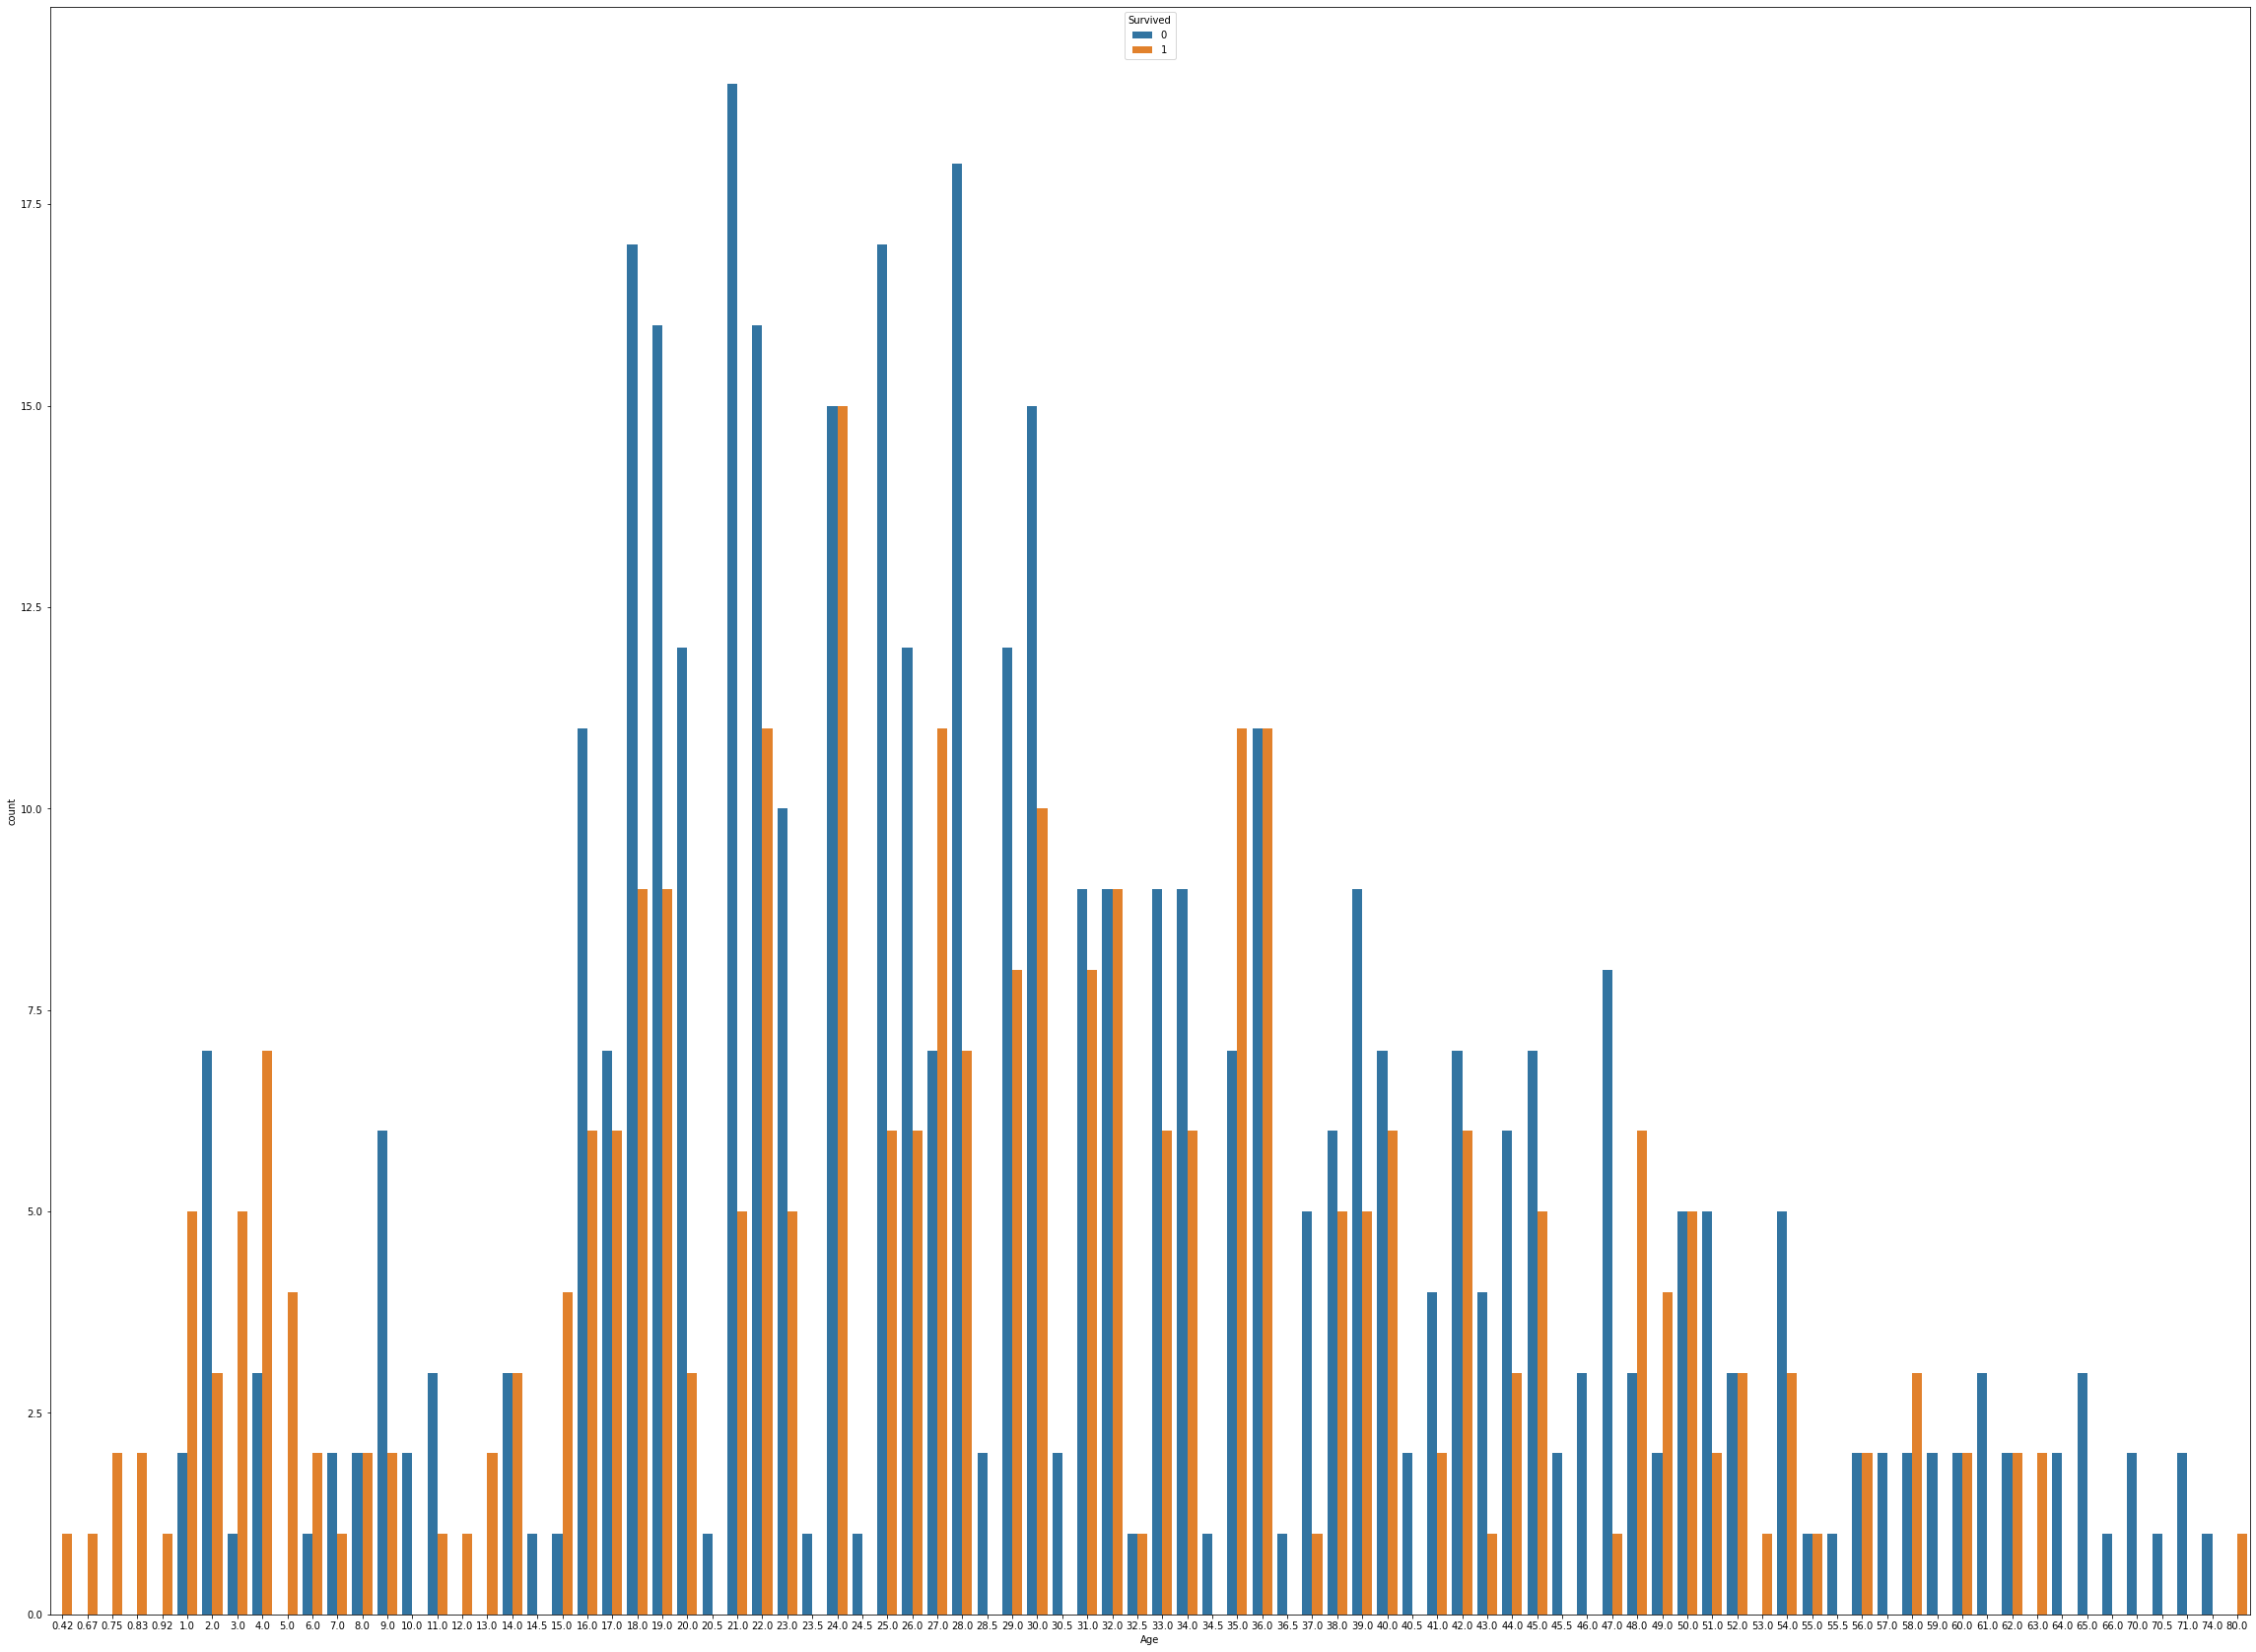

In [43]:
# plot of people who survived against their age 
plt.figure(figsize = (40,30))
sns.countplot(x='Age', hue='Survived', data = training_set)

<AxesSubplot:>

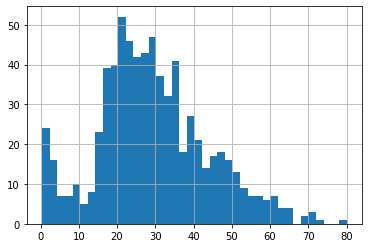

In [44]:
# histogram for distribution of passangers according to their age
training_set['Age'].hist(bins = 40)

<AxesSubplot:xlabel='Fare', ylabel='count'>

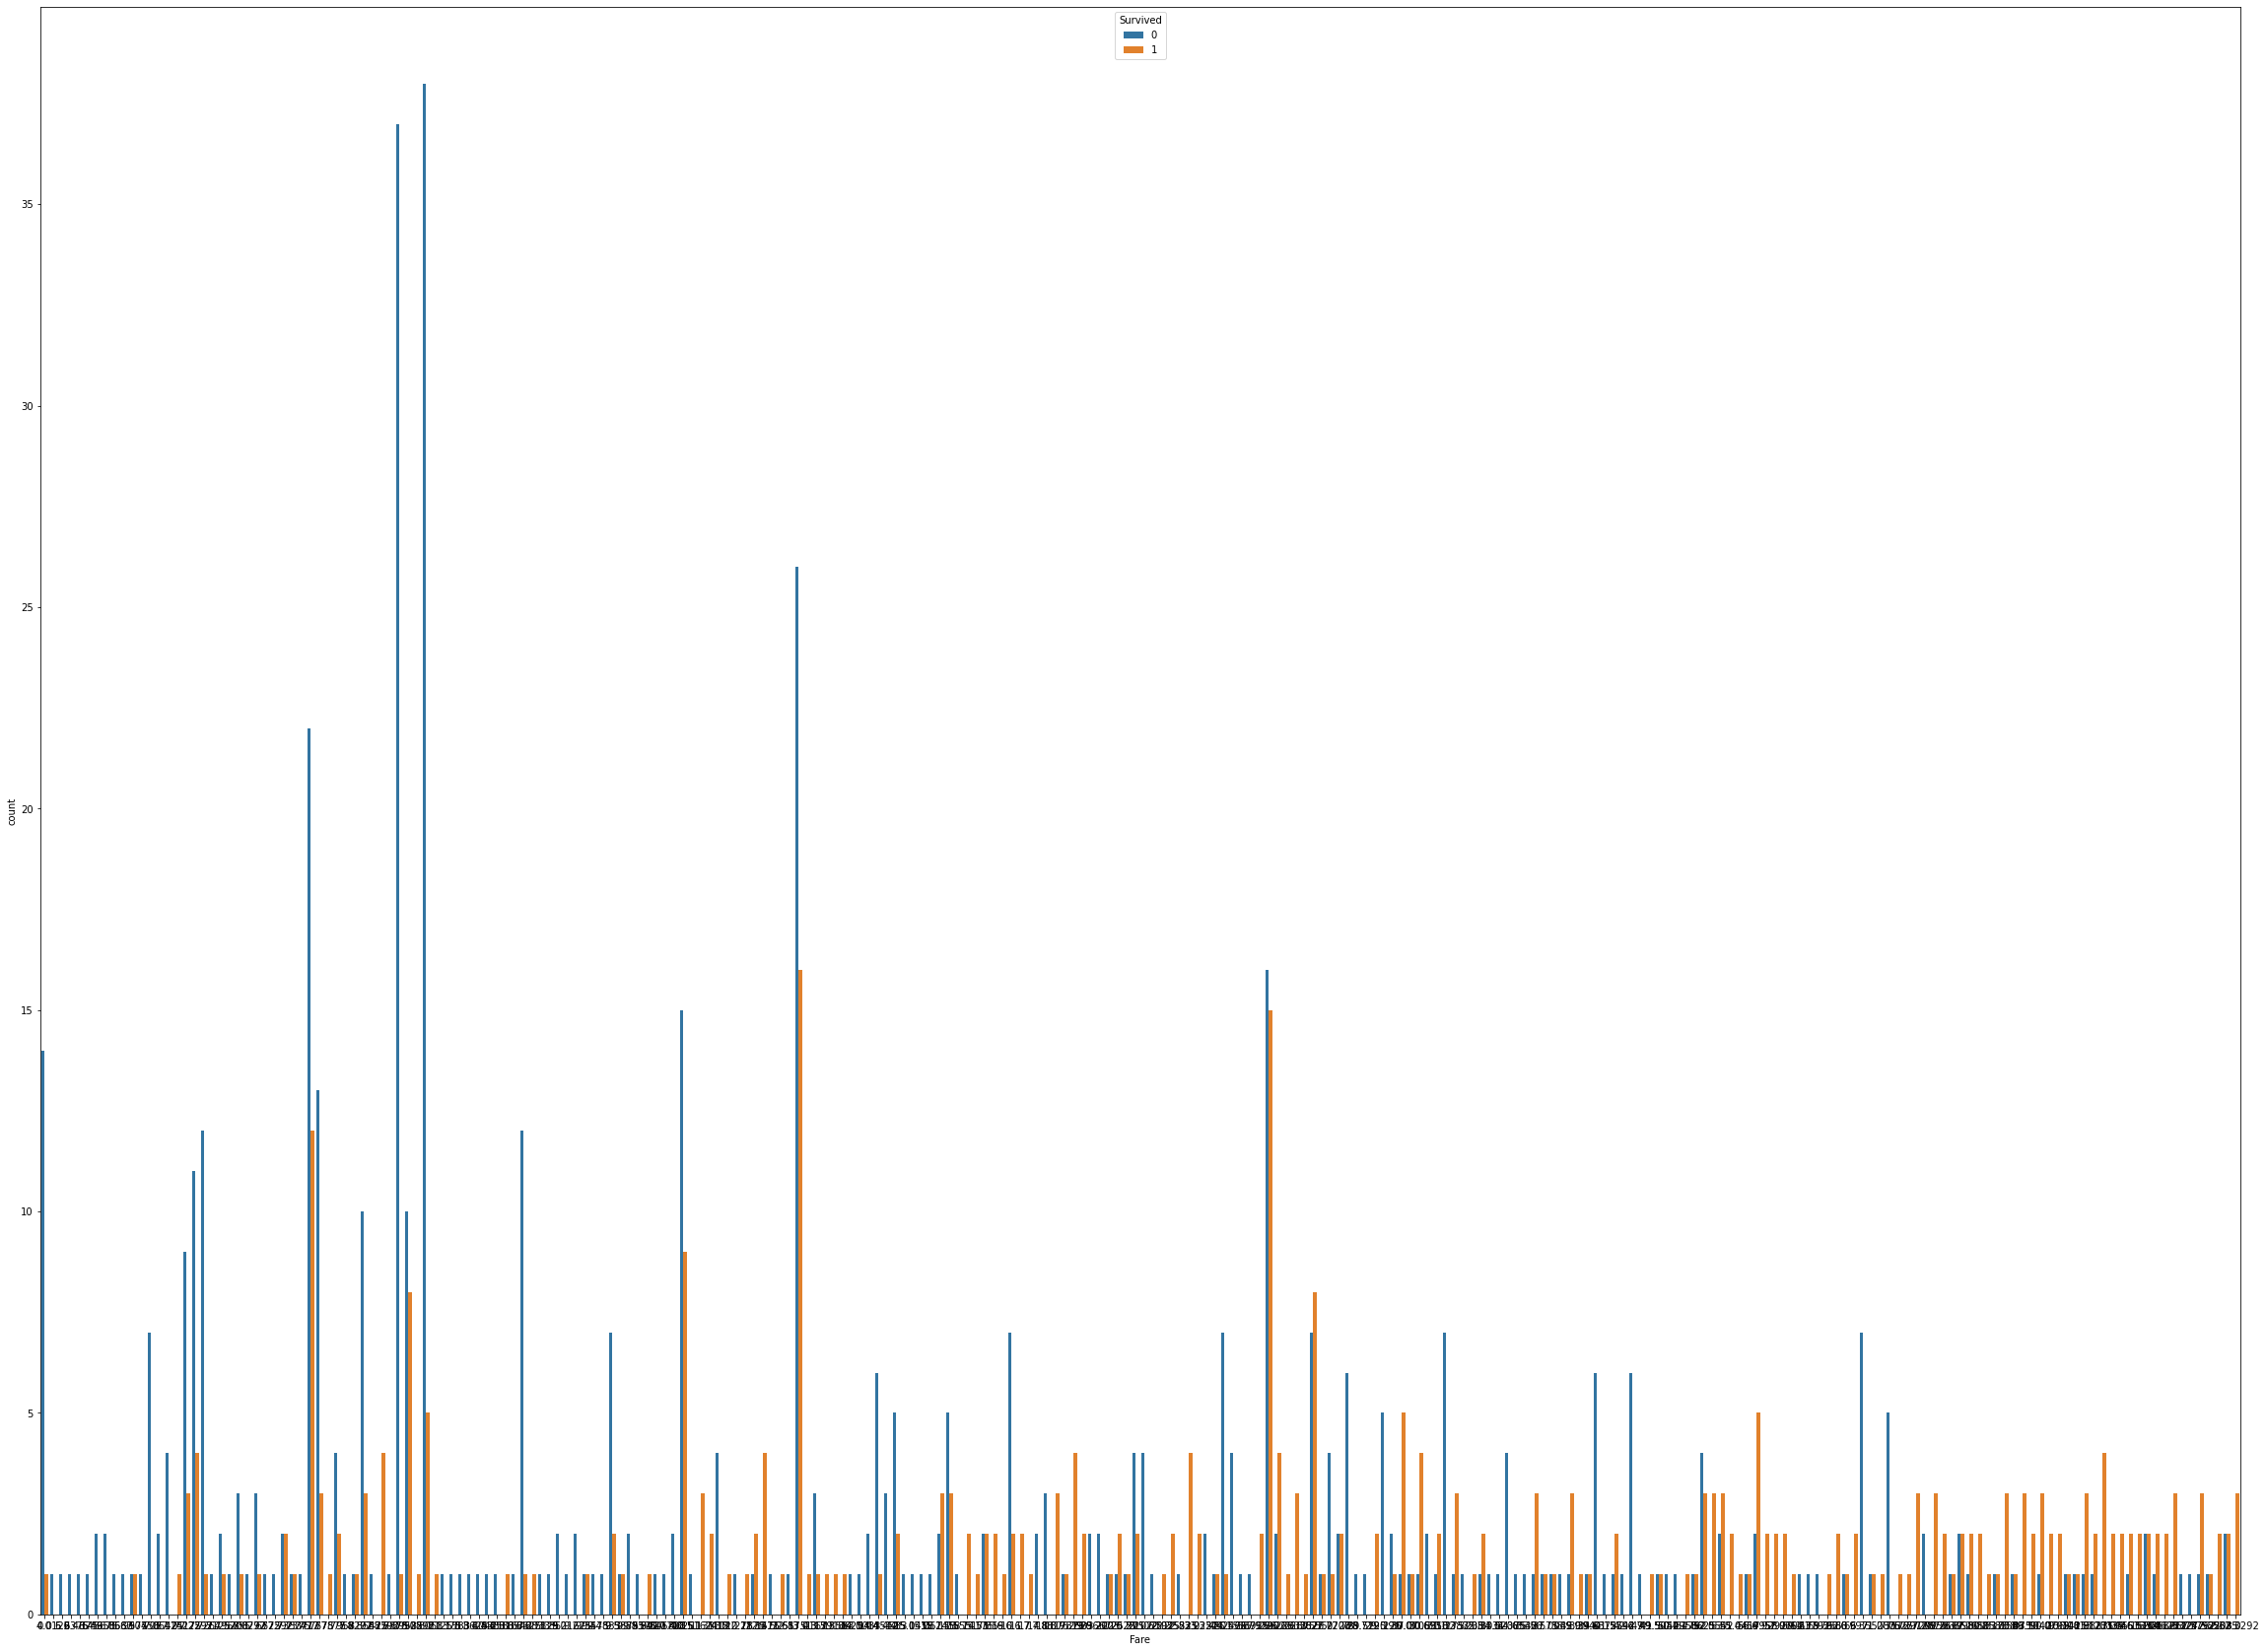

In [45]:
# plot of the survived people against the money spent by them on the fare
plt.figure(figsize = (40, 30))
sns.countplot(x='Fare', hue='Survived', data = training_set)

<AxesSubplot:>

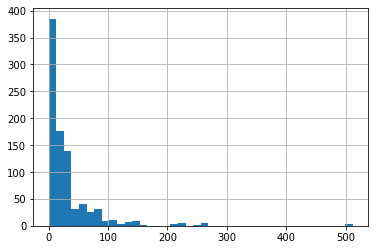

In [46]:
# distribution passangers according to the money spent on fare
training_set['Fare'].hist(bins = 40)

STEP #3: PREPARE THE DATA FOR TRAINING / DATA CLEANING

In [47]:
training_set

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

<AxesSubplot:>

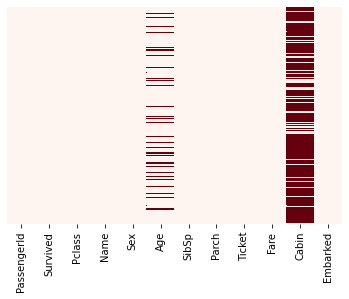

In [48]:
# visualising all null values in the dataframe
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Reds')

In [49]:
# return the rows and columns of the data frame as a tuple
training_set.shape

(891, 12)

In [50]:
# drop columns which are unnecessary
training_set.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis = 1, inplace = True)

<AxesSubplot:>

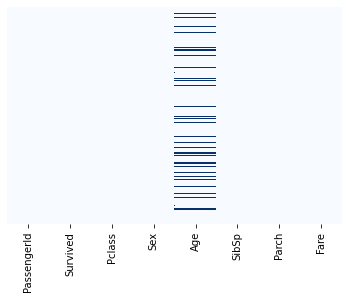

In [51]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

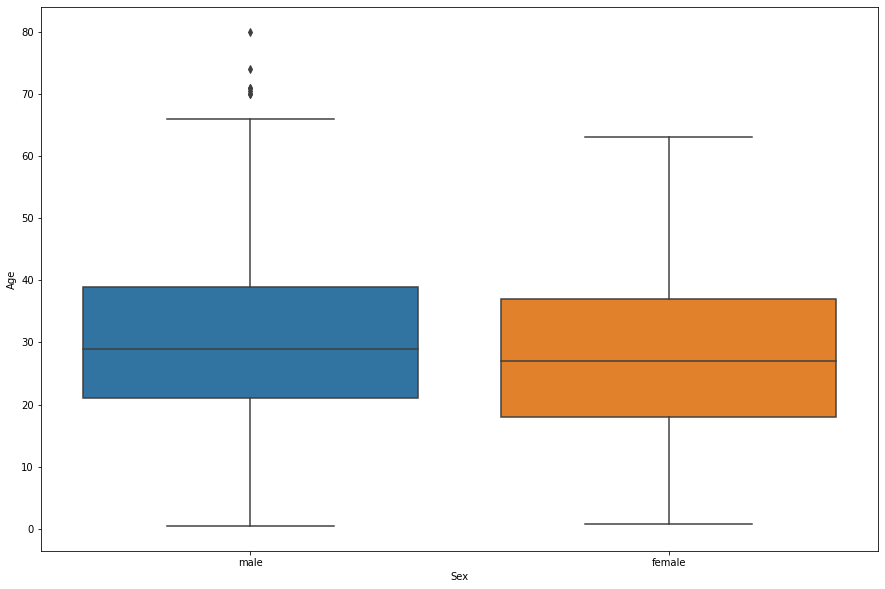

In [52]:
# plotting the age and sex relation in the data
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex', y='Age', data= training_set)

In [53]:
# a function to fill the null age with the mean age that we have assumes a 29 and 25
def fillAge(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex is 'male':
            return 29
        else:
            return 25
    else:
        return age

In [54]:
# applying the fillAge function on the datafram
training_set['Age'] = training_set[['Age', 'Sex']].apply(fillAge, axis=1)

<AxesSubplot:>

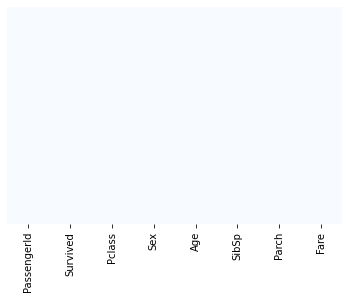

In [55]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='Blues')

<AxesSubplot:>

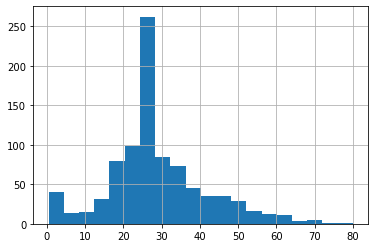

In [56]:
# data gets skewed because we filled the missing ages according to the mean. Compare this with the previous age histogram
training_set['Age'].hist(bins = 20)


In [58]:
# dropping passengerid column
training_set.drop('PassengerId', axis = 1, inplace = True)

In [59]:
# extracting the sex as a binary value from the datafram store in the male series
male = pd.get_dummies(training_set['Sex'], drop_first=True)
male

In [62]:
# dropping the sex column and concatenating the binary values for age stored in male series
training_set.drop('Sex', axis=1, inplace=True)
training_set = pd.concat([training_set, male], axis=1)

In [63]:
training_set

Survived  Pclass   Age  SibSp  Parch     Fare  male
0           0       3  22.0      1      0   7.2500     1
1           1       1  38.0      1      0  71.2833     0
2           1       3  26.0      0      0   7.9250     0
3           1       1  35.0      1      0  53.1000     0
4           0       3  35.0      0      0   8.0500     1
..        ...     ...   ...    ...    ...      ...   ...
886         0       2  27.0      0      0  13.0000     1
887         1       1  19.0      0      0  30.0000     0
888         0       3  25.0      1      2  23.4500     0
889         1       1  26.0      0      0  30.0000     1
890         0       3  32.0      0      0   7.7500     1

[891 rows x 7 columns]

In [74]:
# separating the target class 'Survived' from the rest of the data
X = training_set.drop('Survived', axis=1).values
y = training_set['Survived'].values

STEP #4: MODEL TRAINING

In [75]:
# splitting the data into training data and testing data in 80-20 portion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [76]:
# importing the logistic regression model and defining a classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

STEP #5: MODEL TESTING

In [78]:
# predicting the survival on test data
y_predict = classifier.predict(X_test)
y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

<AxesSubplot:>

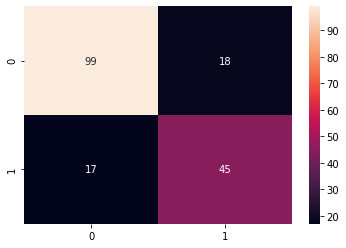

In [83]:
# importing and printing the confusion matrix for the classifier performance
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt = 'd')

In [85]:
# printing classification report for the predicted and actual data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179

